In [4]:
from google.colab import drive
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import pickle

dict_path = "/content/drive/MyDrive/Github_NLP/NLP_with_PyTorch/Chapter7_Seq_Modeling_Intermediate/data/"

with open(dict_path + "UnConditioned_Train_State.pickle", "rb") as f:
  train_state_uncond = pickle.load(f)

with open(dict_path + "Conditioned_Train_State.pickle", "rb") as f:
  train_state_cond = pickle.load(f)

In [8]:
def plot(targets, labels=None,  figsize=None, xlabel=None, ylabel=None, grid=False, ylim=[], title=None, legend=False, markers=None):
  if figsize != None:
    plt.figure(figsize=figsize)

  if labels == None:
    labels = [None] * len(targets)
  for i, target in enumerate(targets):
    target = np.array(target)
    x = np.arange(len(target))
    plt.plot(x, target, label=labels[i], marker=markers)
  if len(ylim) != 0:
    plt.ylim(ylim[0], ylim[1])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(grid)
  if legend:
    plt.legend()

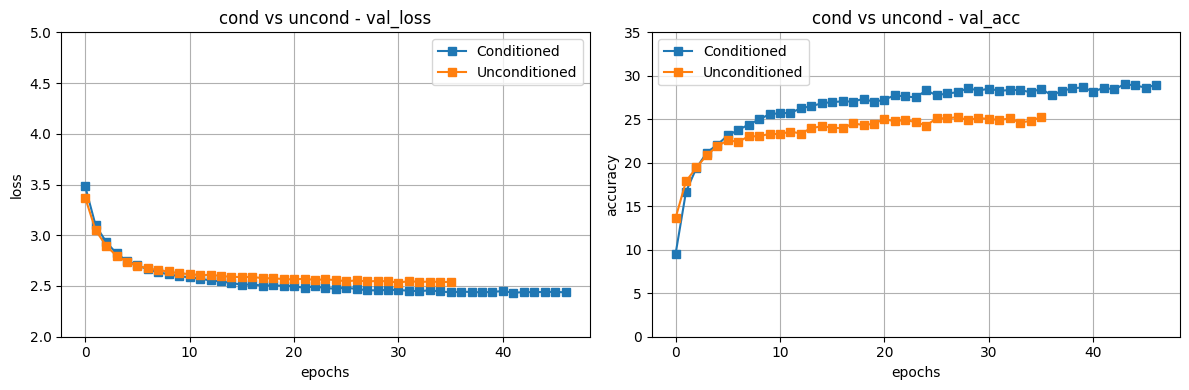

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot(
    targets=(train_state_cond["val_loss"], train_state_uncond["val_loss"]),
    labels = ["Conditioned", "Unconditioned"],
    xlabel = "epochs",
    ylabel = "loss",
    ylim =[2, 5],
    grid = True,
    title = "cond vs uncond - val_loss",
    legend=True,
    markers="s"
    )
plt.subplot(122)
plot(
    targets=(train_state_cond["val_acc"], train_state_uncond["val_acc"]),
    labels = ["Conditioned", "Unconditioned"],
    xlabel = "epochs",
    ylabel = "accuracy",
    grid = True,
    ylim=[0,35],
    title = "cond vs uncond - val_acc",
    legend=True,
    markers="s"
    )
plt.tight_layout()
plt.show()